<a href="https://colab.research.google.com/github/faisalnawazmir/Econometrics-ML_for_Finance/blob/main/Diagnosis_Econometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import statsmodels.formula.api as smf
import pickle
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from statsmodels.compat import lzip

In [9]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [12]:
abspath=r'/gdrive/My Drive/data/'
with open(abspath+'macro.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [14]:
#file = r'/gdrive/My Drive/data/macro.xls'
#data= pd.read_excel(file)
data = data.dropna() # drop the missing values for some columns

In [15]:
data.head()

,dspread,dcredit,dprod,rmsoft,rsandp,dmoney,inflation,term,dinflation,mustb3m,rterm,ermsoft,ersandp
2,-0.20,7.5483,0.1196,8.183334,4.900851,-1.3,0.275862,1.38,0.459855,0.527500,0.32,7.655834,4.373351
3,0.01,5.9758,-0.1891,-12.945833,1.401091,17.1,0.549452,1.40,0.273590,0.533333,0.02,-13.479167,0.867757
4,0.07,5.7173,0.3137,-7.599084,-6.047514,10.6,0.000000,1.30,-0.549452,0.500000,-0.10,-8.099084,-6.547514
5,0.18,6.9043,-0.0748,0.000000,6.877261,5.0,0.182482,1.48,0.182482,0.474167,0.18,-0.474167,6.403095
6,-0.15,9.3754,0.1135,-0.881009,-8.931068,6.1,0.454753,2.10,0.272271,0.445833,0.62,-1.326843,-9.376901


In [16]:
formula = 'ermsoft ~ ersandp + dprod + dcredit + \
dinflation + dmoney + dspread + rterm '
results = smf.ols(formula, data).fit(cov_type='HAC',cov_kwds={'maxlags':6,'use_correction':True})
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                ermsoft   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     24.93
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           6.73e-28
Time:                        14:51:52   Log-Likelihood:                -1328.3
No. Observations:                 383   AIC:                             2673.
Df Residuals:                     375   BIC:                             2704.
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3260      0.503      2.638      0.0

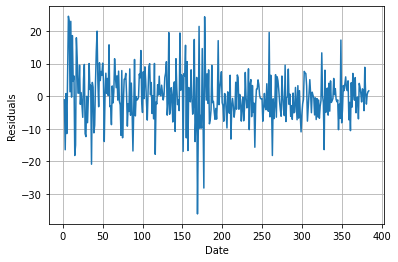

In [17]:
plt.figure(1)
plt.plot(results.resid)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [18]:
# breusch-pagan heteroskedasticity test
name = ['Lagrange multiplier statistic', 'p-value',
'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 3.1606601504201874),
 ('p-value', 0.8697526743786506),
 ('f-value', 0.44577025527121455),
 ('f p-value', 0.8729003404188317)]

In [ ]:
# Ho= homo or equal variance
#p-value<0.05, reject Ho,  conclude there hetro issue.